Predicted Non-fraud cases: 65736
Predicted Fraud cases: 3
Accuracy: 0.9978703661449063
Precision: 0.6666666666666666
Recall: 0.014184397163120567
F1 Score: 0.027777777777777776
ROC-AUC: 0.800991002796098


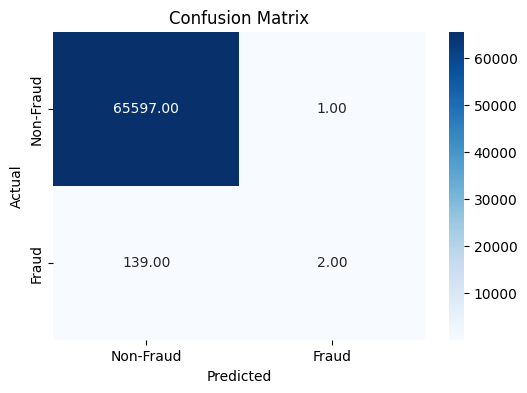

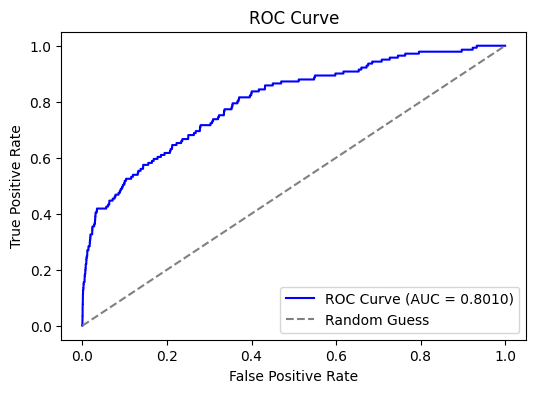

In [ ]:
# xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample

# 讀取原始資料
train_data_path = "train.csv"
data = pd.read_csv(train_data_path)

# 分離特徵與標籤
X = data.drop(columns=['Class', 'id'])  # 特徵
y = data['Class']  # 標籤

# 將資料分為訓練集和測試集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 訓練 XGBoost 模型
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

# 預測測試資料
test_predictions = xgb_model.predict(X_test)

# 計算詐欺和非詐欺的數量
non_fraud_count = sum(test_predictions == 0)
fraud_count = sum(test_predictions == 1)

# 打印結果
print("Predicted Non-fraud cases:", non_fraud_count)
print("Predicted Fraud cases:", fraud_count)

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np

# 計算混淆矩陣
y_test_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)



# 可視化混淆矩陣（百分比形式）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True,fmt=".2f", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 計算 ROC 曲線和 AUC 值
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]  # 詐欺類別的預測概率
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# 可視化 ROC 曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Predicted Non-fraud cases: 65706
Predicted Fraud cases: 33
Accuracy: 0.9974444393738876
Precision: 0.09090909090909091
Recall: 0.02127659574468085
F1 Score: 0.034482758620689655
ROC-AUC: 0.6027904435764885


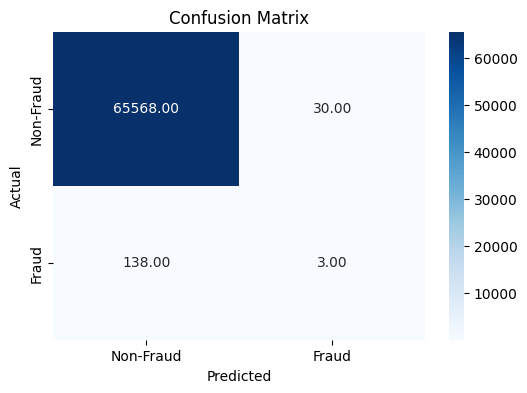

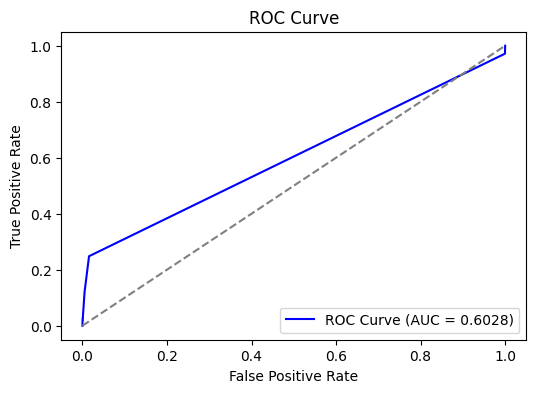

In [ ]:
# decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 讀取原始資料
train_data_path ="train.csv"
data = pd.read_csv(train_data_path)

# 分離特徵與標籤
X = data.drop(columns=['Class', 'id'])  # 特徵
y = data['Class']  # 標籤

# 將資料分為訓練集和測試集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



# 訓練 Decision Tree 模型
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
dt_model.fit(X_train, y_train)

# 預測測試資料
test_predictions = dt_model.predict(X_test)

# 計算詐欺和非詐欺的數量
non_fraud_count = sum(test_predictions == 0)
fraud_count = sum(test_predictions == 1)

# 打印結果
print("Predicted Non-fraud cases:", non_fraud_count)
print("Predicted Fraud cases:", fraud_count)

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# 計算混淆矩陣
y_test_pred = dt_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)



# 可視化混淆矩陣（百分比形式）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 計算 ROC 曲線和 AUC 值
y_test_proba = dt_model.predict_proba(X_test)[:, 1]  # 取詐欺類別的概率
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# 可視化 ROC 曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Predicted Non-fraud cases: 64877
Predicted Fraud cases: 862
Accuracy: 0.9856553948189051
Precision: 0.03480278422273782
Recall: 0.2127659574468085
F1 Score: 0.05982053838484546
ROC-AUC: 0.7738883018185774


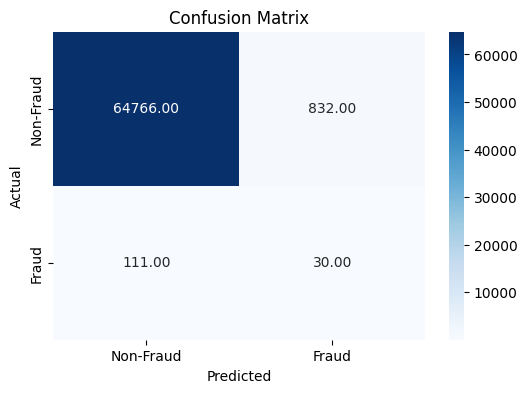

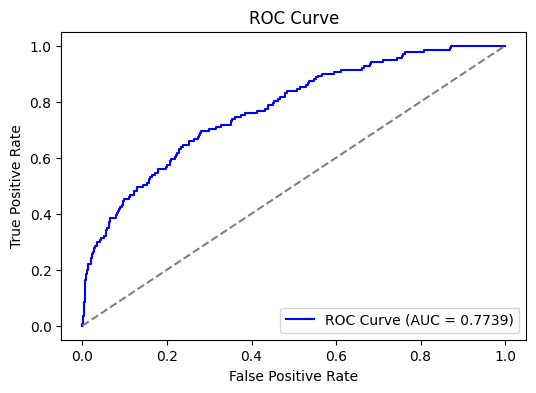

In [ ]:
# RandomForest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 讀取原始資料
train_data_path = "train.csv"
data = pd.read_csv(train_data_path)

# 分離特徵與標籤
X = data.drop(columns=['Class', 'id'])  # 特徵
y = data['Class']  # 標籤

# 將資料分為訓練集和測試集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



# 訓練 Random Forest 模型
rf_model = RandomForestClassifier(n_estimators=100,max_depth=7, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# 預測測試資料
test_predictions = rf_model.predict(X_test)

# 計算詐欺和非詐欺的數量
non_fraud_count = sum(test_predictions == 0)
fraud_count = sum(test_predictions == 1)

# 打印結果
print("Predicted Non-fraud cases:", non_fraud_count)
print("Predicted Fraud cases:", fraud_count)

accuracy = accuracy_score(y_test,test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# 計算混淆矩陣
y_test_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)


# 可視化混淆矩陣（百分比形式）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 計算 ROC 曲線和 AUC 值
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # 取詐欺類別的概率
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# 可視化 ROC 曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()